# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import trange
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### Информация по данным в каждой таблице

In [ ]:
region_1 = pd.read_csv('/datasets/geo_data_0.csv')
region_2 = pd.read_csv('/datasets/geo_data_1.csv')
region_3 = pd.read_csv('/datasets/geo_data_2.csv')

datasets = [region_1, region_2, region_3]
name_of_regions = ['Регион 1', 'Регион 2', 'Регион 3']

Напишем функцию, которая поможет нам изучить каждый датефрейм:

In [ ]:
def information(df):
    print(name_of_regions[index], '\n')
    print('Первые 15 строк таблицы:')
    display(df.head(15))
    print()
    print('Информация о столбцах таблицы методом .describe():')
    display(df.describe().T)
    print()
    print('Информация о столбцах таблицы методом .info():')
    print()
    display(df.info())
    print()
    print('Процент пропусков в каждом столбце в порядке убывания')
    display(df.isna().mean().sort_values(ascending = False))
    print()
    print('Кол-во дубликатов в таблице:')
    display(df.duplicated().sum())
    print('-' * 60)
    print()

In [ ]:
for index in range(len(datasets)):
    information(datasets[index])

Регион 1 

Первые 15 строк таблицы:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945



Информация о столбцах таблицы методом .describe():


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347



Информация о столбцах таблицы методом .info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Процент пропусков в каждом столбце в порядке убывания


product    0.0
f2         0.0
f1         0.0
f0         0.0
id         0.0
dtype: float64


Кол-во дубликатов в таблице:


0

------------------------------------------------------------

Регион 2 

Первые 15 строк таблицы:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408



Информация о столбцах таблицы методом .describe():


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408



Информация о столбцах таблицы методом .info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Процент пропусков в каждом столбце в порядке убывания


product    0.0
f2         0.0
f1         0.0
f0         0.0
id         0.0
dtype: float64


Кол-во дубликатов в таблице:


0

------------------------------------------------------------

Регион 3 

Первые 15 строк таблицы:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532



Информация о столбцах таблицы методом .describe():


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838



Информация о столбцах таблицы методом .info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Процент пропусков в каждом столбце в порядке убывания


product    0.0
f2         0.0
f1         0.0
f0         0.0
id         0.0
dtype: float64


Кол-во дубликатов в таблице:


0

------------------------------------------------------------



#### Вывод по подпункту:

В целом данные готовы для дальнейшей работы, следует удалить столбец ***id*** во всех датасетах.

### Предобработка данных:

#### Удаление ненужного столбца:

In [ ]:
region_1 = region_1.drop('id', axis=1)
region_2 = region_2.drop('id', axis=1)
region_3 = region_3.drop('id', axis=1)

Проверка:

In [ ]:
print(region_1.columns)
print(region_2.columns)
print(region_3.columns)

Index(['f0', 'f1', 'f2', 'product'], dtype='object')
Index(['f0', 'f1', 'f2', 'product'], dtype='object')
Index(['f0', 'f1', 'f2', 'product'], dtype='object')


#### Разбиение  данных на выборки:

Напишем функцию для разбиения данных на тренировочную и валидационную выборки:

In [ ]:
def splitting(df):
    train, valid = train_test_split(df, test_size=0.25, random_state=244466666)
    features_train = train.drop('product', axis=1)
    target_train = train['product']
    features_valid = valid.drop('product', axis=1)
    target_valid = valid['product']
    return features_train, target_train, features_valid, target_valid

In [ ]:
features_train_1, target_train_1, features_valid_1, target_valid_1 = splitting(region_1)
features_train_2, target_train_2, features_valid_2, target_valid_2 = splitting(region_2)
features_train_3, target_train_3, features_valid_3, target_valid_3 = splitting(region_3)

Проверка:

In [ ]:
print(features_train_1.shape[0], features_valid_1.shape[0])
print(features_train_2.shape[0], features_valid_2.shape[0])
print(features_train_3.shape[0], features_valid_3.shape[0])

75000 25000
75000 25000
75000 25000


#### Стандартизизация признаков:

In [ ]:
scaler = StandardScaler()
numeric = ['f0', 'f1', 'f2']

scaler.fit(features_train_1[numeric])
features_train_1[numeric] = scaler.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler.transform(features_valid_1[numeric])

scaler.fit(features_train_2[numeric])
features_train_2[numeric] = scaler.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler.transform(features_valid_2[numeric])

scaler.fit(features_train_3[numeric])
features_train_3[numeric] = scaler.transform(features_train_3[numeric])
features_valid_3[numeric] = scaler.transform(features_valid_3[numeric])

Проверка:

In [ ]:
display(features_train_1.head(), features_train_2.head(), features_train_3.head())

,f0,f1,f2
38978,-0.314770,1.187827,-0.970573
5575,-0.777615,-0.084848,-0.254861
62002,-1.163313,1.095936,-1.254631
63838,1.290765,-0.808082,-1.342485
62387,1.284911,-0.829233,1.008959


,f0,f1,f2
38978,0.068109,-0.098654,-0.874225
5575,-0.776280,-0.781879,1.474187
62002,0.872689,-0.918625,0.299326
63838,0.406681,-1.332108,-0.285825
62387,0.575750,0.836044,0.294522


,f0,f1,f2
38978,-0.692693,-0.492227,0.177308
5575,0.971449,-0.599661,-0.766957
62002,0.426305,2.563588,-0.265031
63838,-0.881178,0.169704,-0.991546
62387,1.327877,1.472161,-1.610531


#### Вывод по подпункту:

В ходе предобработки данных были выполнены следующие операции:
- Был удален лишний столбец
- Данные были разбиты на обучающую и валидационную выборки
- Была проведена стандартизация признаков

## Обучение и проверка модели

Напишем функцию для обучения модели и получения предсказаний:

In [ ]:
linear_regression_model = LinearRegression()

def learning_and_predicted_values(features_train, target_train, features_valid, target_valid):
    linear_regression_model.fit(features_train, target_train)
    predicted_values = pd.Series(linear_regression_model.predict(features_valid), target_valid.index)
    return predicted_values

In [ ]:
predicted_1 = learning_and_predicted_values(features_train_1, target_train_1, features_valid_1, target_valid_1)
predicted_2 = learning_and_predicted_values(features_train_2, target_train_2, features_valid_2, target_valid_2)
predicted_3 = learning_and_predicted_values(features_train_3, target_train_3, features_valid_3, target_valid_3)

Выведем информацию по каждому региону:

In [ ]:
prediction_list = [predicted_1, predicted_2, predicted_3]
target_list = [target_valid_1, target_valid_2, target_valid_3]

In [ ]:
for _ in range(len(prediction_list)):
    mse = mean_squared_error(target_list[_], prediction_list[_])
    mean_predicted_volume = prediction_list[_].mean()
    print(name_of_regions[_])
    print('Предсказанный средний объем запасов:', mean_predicted_volume)
    print('RMSE:', mse ** 0.5, '\n')

Регион 1
Предсказанный средний объем запасов: 92.46291804433594
RMSE: 37.573638658796064 

Регион 2
Предсказанный средний объем запасов: 69.06227441615115
RMSE: 0.8958341043644462 

Регион 3
Предсказанный средний объем запасов: 95.13039726784767
RMSE: 40.060549502648456 



### Вывод

Модели 1 и 3 регионов показывают плохие значения среднеквадратичной ошибки. Не стоит использовать их для выбора скважины в регионе.

## Подготовка к расчёту прибыли

In [ ]:
BUDGET_TOTAL = 10000000000 
WELLS_TOTAL = 200 
COST_OF_PRODUCT_UNIT = 450000 
LOSS_PROBABILITY = 0.025 
COST_OF_WELL = BUDGET_TOTAL / WELLS_TOTAL 
MIN_VOLUME_FOR_WELL = COST_OF_WELL / COST_OF_PRODUCT_UNIT

print('Цена одной скважины:', COST_OF_WELL)
print('Минимальный для окупаемости объем сырья в скважине: {:.2f}'.format(MIN_VOLUME_FOR_WELL), 'тыс.баррелей')

Цена одной скважины: 50000000.0
Минимальный для окупаемости объем сырья в скважине: 111.11 тыс.баррелей


### Вывод

Достаточный объём сырья для безубыточной разработки новой скважины равен 111 т.баррелей. Ни один из средних запасов сырья в каждом регионе не удовлетворяет данному требованию.

## Расчёт прибыли и рисков 

Напишем функцию для расчета прибыли:

In [ ]:
predicted_2.sort_values(ascending=False)

31063    139.762648
14041    139.700702
33785    139.668617
11934    139.648847
24274    139.557304
            ...    
74706    110.640820
76663    110.640141
33876    110.639956
64243    110.639948
95153    110.639744
Length: 5000, dtype: float64

In [ ]:
def profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return COST_OF_PRODUCT_UNIT * selected.sum() - BUDGET_TOTAL

Регион 1

Средняя прибыль: 470845067.89
2.5й квантиль: -45733066.14
97.5й квантиль: 996401552.77
Риск в %: 4.40
95% Доверительный интервал: (-45733066.14 - 996401552.77)


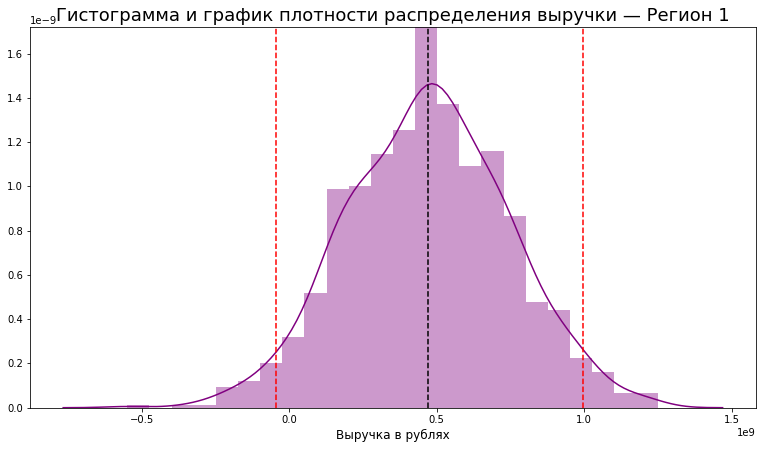

------------------------------------------------------------------------------------------------------------------------ 

Регион 2

Средняя прибыль: 507766008.65
2.5й квантиль: 78050810.75
97.5й квантиль: 955800861.20
Риск в %: 1.30
95% Доверительный интервал: (78050810.75 - 955800861.20)


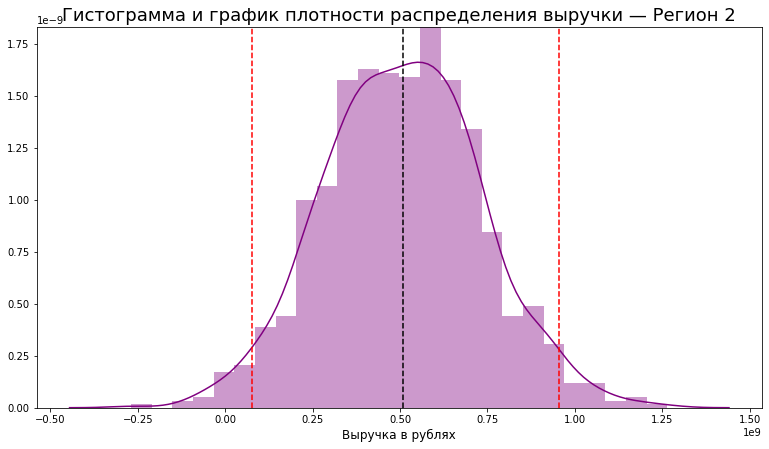

------------------------------------------------------------------------------------------------------------------------ 

Регион 3

Средняя прибыль: 415672372.59
2.5й квантиль: -138893589.55
97.5й квантиль: 960392607.36
Риск в %: 6.80
95% Доверительный интервал: (-138893589.55 - 960392607.36)


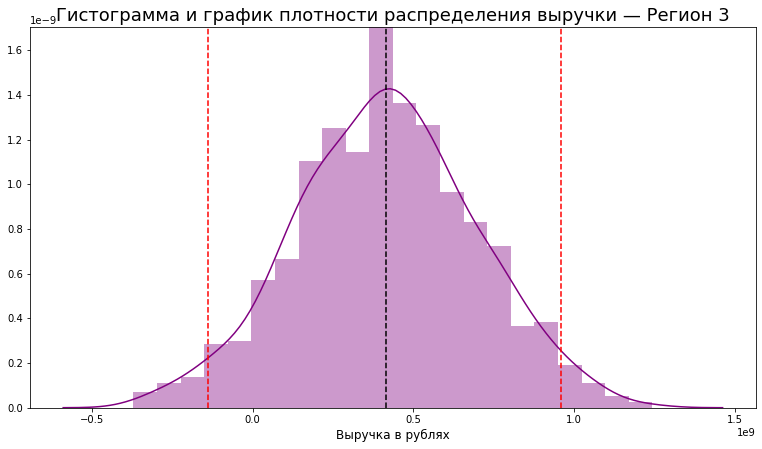

------------------------------------------------------------------------------------------------------------------------ 



In [ ]:
state = np.random.RandomState(244466666) 

for index in range(len(prediction_list)):
    values_of_revenues = []
    
    for _ in range(1000):
        target_subsample = target_list[index].sample(n=500, replace=True, random_state=state)
        probs_subsample = prediction_list[index][target_subsample.index]
        values_of_revenues.append(profit(target_subsample, probs_subsample, WELLS_TOTAL))
        
    values_of_revenues = pd.Series(values_of_revenues)
    lower = values_of_revenues.quantile(0.025)
    upper = values_of_revenues.quantile(0.975)
    mean = values_of_revenues.mean()
    risks = (values_of_revenues < 0).mean() * 100
    print(name_of_regions[index], '\n', sep='')
    print('Средняя прибыль: {:.2f}'.format(mean))
    print('2.5й квантиль: {:.2f}'.format(lower))
    print('97.5й квантиль: {:.2f}'.format(upper))
    print('Риск в %: {:.2f}'.format(risks))
    print('95% Доверительный интервал: ({:.2f}'.format(lower), ' - ', '{:.2f}'.format(upper), ')', sep='') 
    
    plt.figure(figsize=(13,7))
    sns.distplot(values_of_revenues, color='purple')
    plt.axvline(lower, color='red', linestyle='--')
    plt.axvline(upper, color='red', linestyle='--')
    plt.axvline(mean, color='black', linestyle='--')
    plt.title('Гистограмма и график плотности распределения выручки — ' + name_of_regions[index], fontsize=18)
    plt.xlabel('Выручка в рублях', fontsize=12)
    plt.show()
    
    print('-'*120, '\n')

## Вывод

Условиям, поставленным заказчиком, удовлетворяет только регион №2.  
- Риск убытков 1.3%
- Средняя прибыль 507 млн.р.
- RMSE модели линейной регрессии: 0.89

Другие 2 региона не подходят по большим значениям RMSE и высокому (>2.5%) риску убытков.